In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
file = 'Impact_of_Remote_Work_on_Mental_Health.csv'
df = pd.read_csv(file)
df.drop(columns='Employee_ID',inplace=True)
df.replace('None',np.nan,inplace=True)

In [3]:
df.head()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                5000 non-null   int64 
 1   Gender                             5000 non-null   object
 2   Job_Role                           5000 non-null   object
 3   Industry                           5000 non-null   object
 4   Years_of_Experience                5000 non-null   int64 
 5   Work_Location                      5000 non-null   object
 6   Hours_Worked_Per_Week              5000 non-null   int64 
 7   Number_of_Virtual_Meetings         5000 non-null   int64 
 8   Work_Life_Balance_Rating           5000 non-null   int64 
 9   Stress_Level                       5000 non-null   object
 10  Mental_Health_Condition            3804 non-null   object
 11  Access_to_Mental_Health_Resources  5000 non-null   object
 12  Produc

In [6]:
#Describe numeric columns
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [7]:
#Describe category columns
df.select_dtypes(include='object').describe()

,Gender,Job_Role,Industry,Work_Location,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
count,5000,5000,5000,5000,5000,3804,5000,5000,5000,3371,5000,5000
unique,4,7,7,3,3,3,2,3,3,2,3,6
top,Female,Project Manager,Finance,Remote,High,Burnout,No,Decrease,Unsatisfied,Weekly,Good,Oceania
freq,1274,738,747,1714,1686,1280,2553,1737,1677,1755,1687,867


C:\Users\Jnpx_\AppData\Local\Temp\ipykernel_16816\705993038.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=20)


<Figure size 1000x600 with 0 Axes>

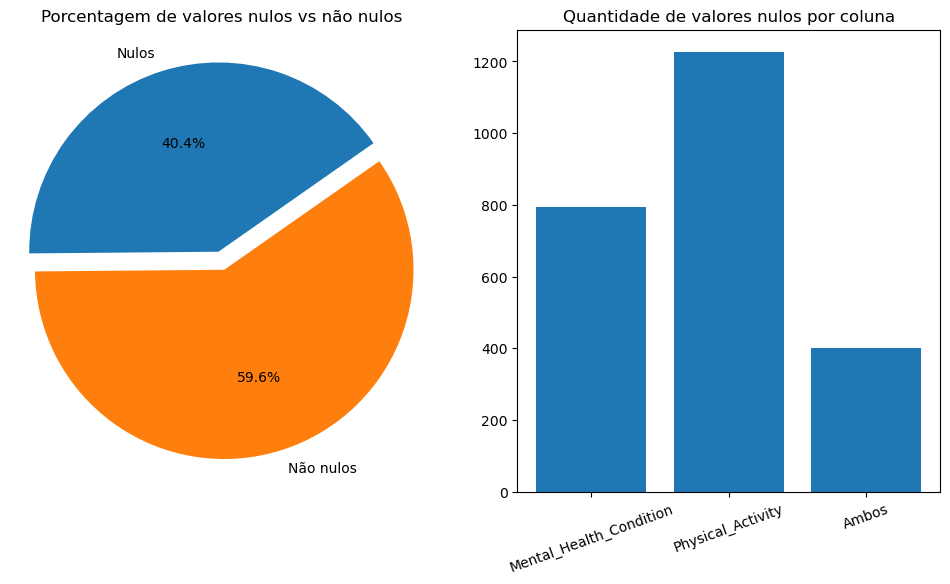

In [140]:
ambos_nulos = df[df['Mental_Health_Condition'].isnull() & df['Physical_Activity'].isnull()]
valores_nulos = df.isnull().sum()
valores_nulos = valores_nulos[valores_nulos>0] - len(ambos_nulos)
nulos = valores_nulos.sum() 
nao_nulos = len(df) - nulos

plt.figure(figsize=(10,6))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.pie(x=[nulos,nao_nulos],
        labels=['Nulos','Não nulos'],
        autopct='%.1f%%',
        explode=(0,0.1),
        startangle=35)
ax1.set_title('Porcentagem de valores nulos vs não nulos')
ax1.axis('equal')

ax2.bar(x=[valores_nulos.index[0],valores_nulos.index[1],'Ambos'],
        height=[valores_nulos[0],valores_nulos[1],len(ambos_nulos)])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=20)
ax2.set_title('Quantidade de valores nulos por coluna')

plt.show()

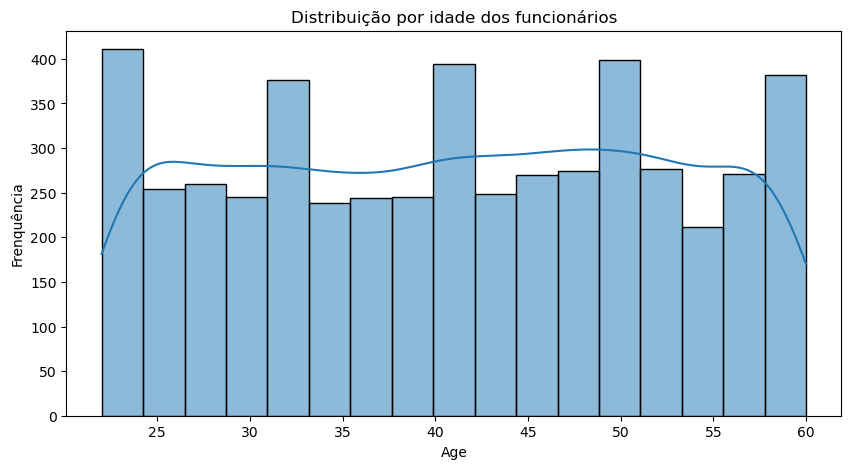

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],kde=True)
plt.title('Distribuição por idade dos funcionários')
plt.xlabel('Age')
plt.ylabel('Frenquência')
plt.show()

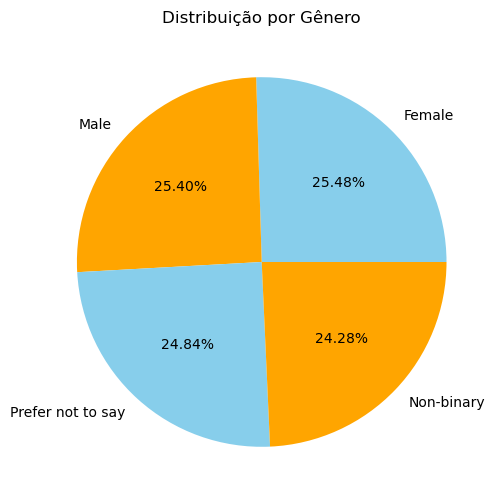

In [9]:
gender_cont = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_cont,labels=gender_cont.index,autopct="%1.2f%%",colors=['skyblue','orange'])
plt.title('Distribuição por Gênero')
plt.show()

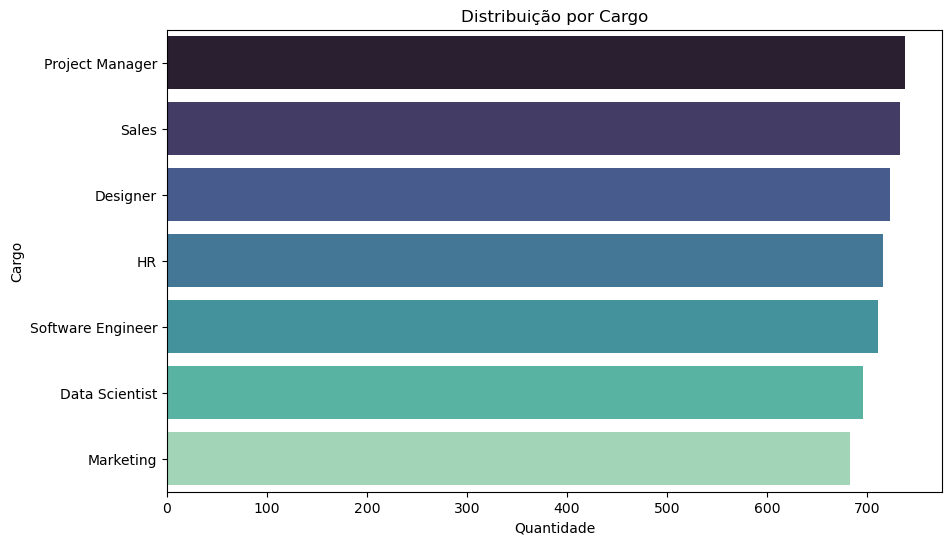

In [10]:
order = df['Job_Role'].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Job_Role', order=order.index,palette='mako')
plt.title('Distribuição por Cargo')
plt.xlabel('Quantidade')
plt.ylabel('Cargo')
plt.show()

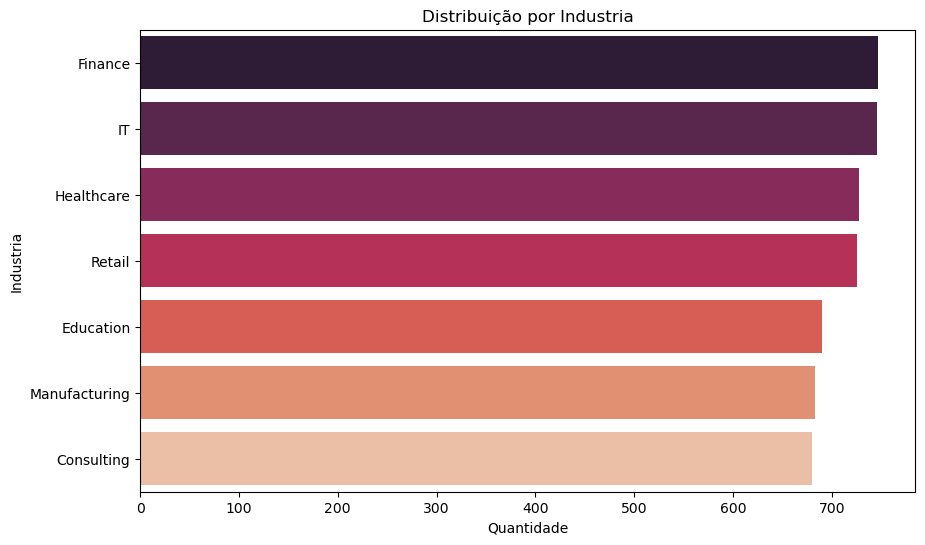

In [11]:
order = df['Industry'].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(data=df,y='Industry',order=order.index,palette='rocket')
plt.title('Distribuição por Industria')
plt.xlabel('Quantidade')
plt.ylabel('Industria')
plt.show()

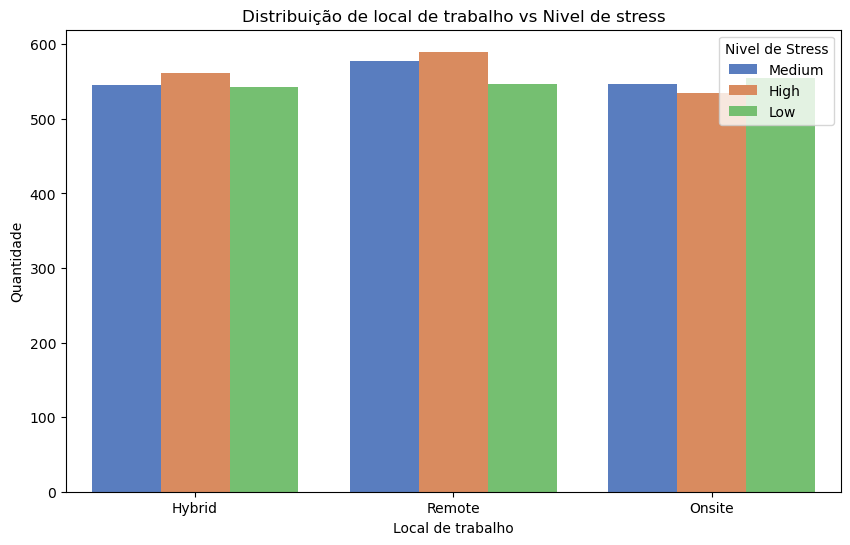

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Work_Location',hue='Stress_Level',palette='muted')
plt.title('Distribuição de local de trabalho vs Nivel de stress')
plt.xlabel('Local de trabalho')
plt.ylabel('Quantidade')
plt.legend(title='Nivel de Stress')
plt.show()

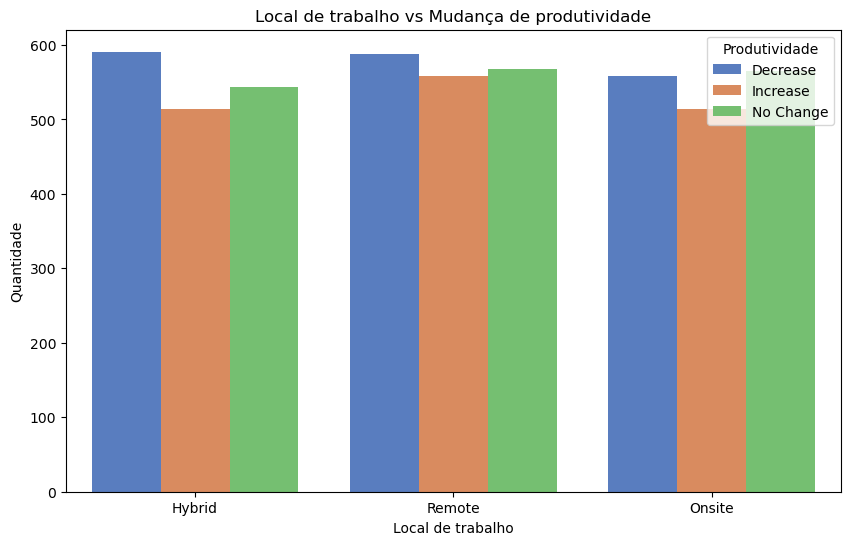

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Work_Location',hue='Productivity_Change',palette='muted')
plt.title('Local de trabalho vs Mudança de produtividade')
plt.xlabel('Local de trabalho')
plt.ylabel('Quantidade')
plt.legend(title='Produtividade')
plt.show()

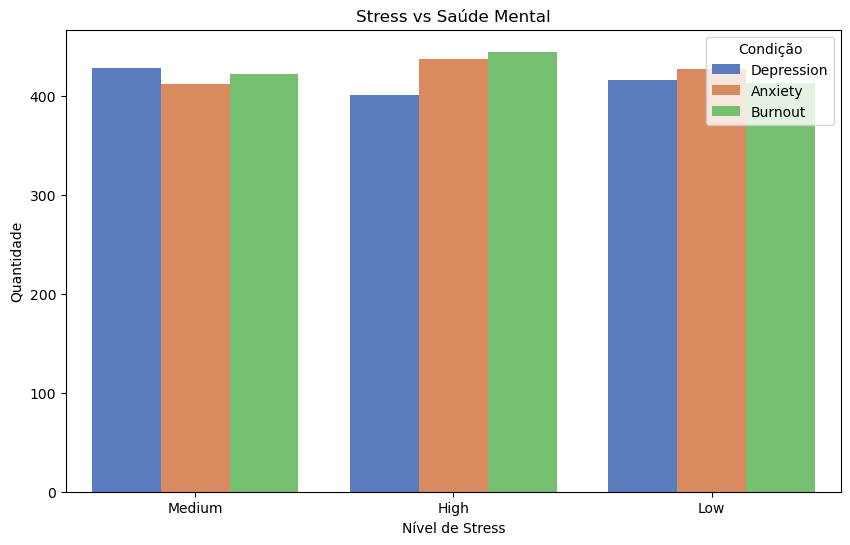

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Stress_Level',hue='Mental_Health_Condition',palette='muted')
plt.title('Stress vs Saúde Mental')
plt.xlabel('Nível de Stress')
plt.ylabel('Quantidade')
plt.legend(title='Condição')
plt.show()

In [15]:
df.head()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


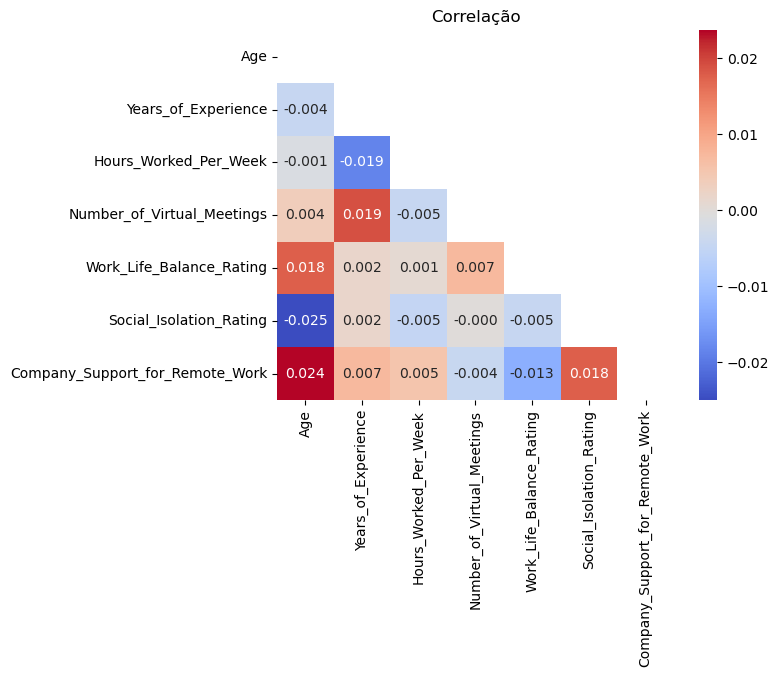

In [16]:
data = df.corr(numeric_only=True)
sns.heatmap(data=data,annot=True,fmt='.3f',cmap='coolwarm',mask=np.triu(data))
plt.title('Correlação')
plt.show()